<a href="https://colab.research.google.com/github/MkDev21IA/data-science-studies/blob/main/Practical_Project_1_Classification_of_Flower_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

There are 4 types of iris flower (setosa, versicolor or virginica) and it can be classified by some characterists:

*   Sepal Lenght (cm)
*   Sepal Width (cm)
*   Petal Lenght (cm)
*   Petal Width (cm)

Through this notebook, we'll use pandas and scikit.learn in the dataset Iris.



In [ ]:
# Importing the libraries
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

---
# Load of dataset and basic lookout

First we'll load the dataset Iris, call the feature_names of X, and call target y. Add two columns on DataFrame X (species_encoded being the target and species_name being name obviously) and finally we show the head and basic info.

In [ ]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target)

X['species_encoded'] = y
X['species_name'] = y.apply(lambda x : iris.target_names[x])

print("--- Fist lines of dataset ---")
print(X.head())
print("\n--- Info of dataset ---")
X.info()


--- Fist lines of dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_encoded species_name  
0                0       setosa  
1                0       setosa  
2                0       setosa  
3                0       setosa  
4                0       setosa  

--- Info of dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (

---
# First Task - Visualization 1
The first task is use seaborn or matplotlib.pyplot to visualize the pairplot using species_name to colorize points and answer the question:

*What features look to be more efficient to separate species?*

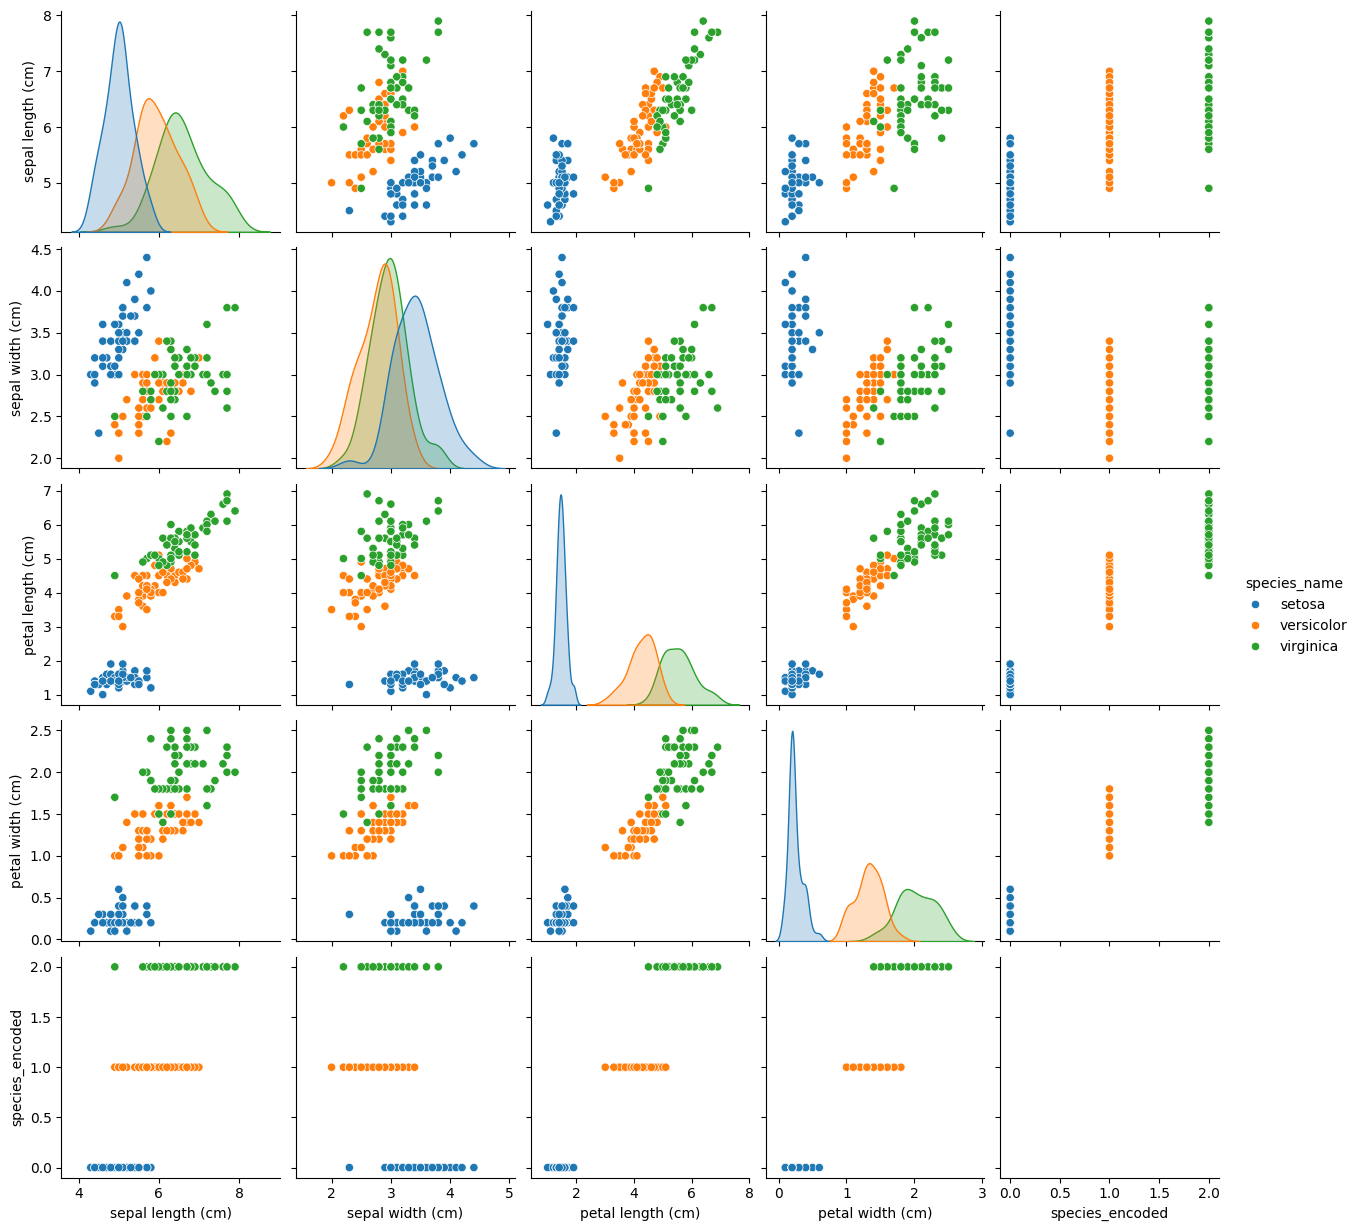

In [ ]:
# We'll use seaborn, because pairplot just doesnt exist in matplotlib.pyplot
sns.pairplot(data = X, hue = 'species_name')

Analysing the graphs, we can see **petal width** and **petal length** are the most important features to separate species. Setosa species has smaller petal width and petal length, while Virginica species has bigger petal widht and petal length, and versicolor species has intermediary characteristics.

---
# First Task - Visualization 2
Create a boxplot or a histogram for the features you identified as most important, separating results by species and answer the question:

*The Species "setosa" is easily distinguible from others?*

<Axes: xlabel='petal width (cm)', ylabel='Count'>

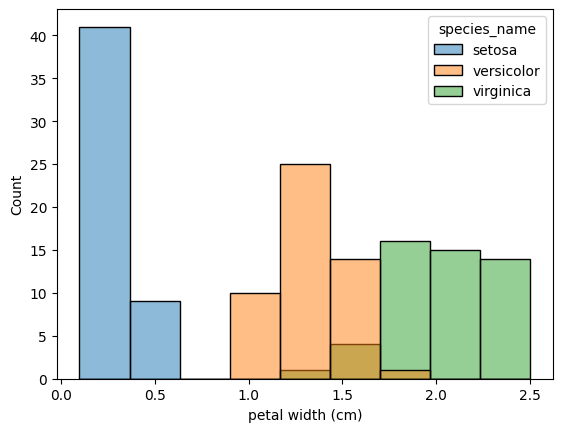

In [ ]:
sns.histplot(data = X, x= 'petal width (cm)',hue = 'species_name')

<Axes: xlabel='species_name', ylabel='petal length (cm)'>

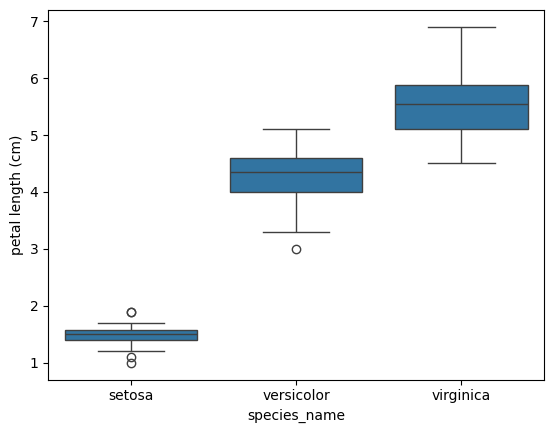

In [ ]:
sns.boxplot(data = X, x = 'species_name', y='petal length (cm)')

The answer is:

Yes, the species setosa is easily distinguible from others because has smaller petal length and petal width.

---
# Data preparation and Model Training

1. First we separate again the dataset;
2. We import the function to separate train and test;
3. Separate 70% for train and 30% for test;
4. We import K-Nearest Neighbors algorithm, instance k=3.
5. Finally train and predict.

In [ ]:
# 1
X_features = X.drop(columns = ['species_encoded', 'species_name'])
y_target = y

# 2
from sklearn.model_selection import train_test_split

# 3 - random_state guarantee same results
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 42)

# 4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# 5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)